<a href="https://www.kaggle.com/code/rkmaurya93/bank-dataset-binary-calssification?scriptVersionId=256877081" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv",index_col=0)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [4]:
df.shape

(750000, 17)

# Working with the categorical columns:

### Counting the repetation of values:

In [5]:
categorical_features=df.select_dtypes(include='object').columns

In [6]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [7]:
df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome
id,,,,,,,,,
0,technician,married,secondary,no,no,no,cellular,aug,unknown
1,blue-collar,married,secondary,no,no,no,unknown,jun,unknown
2,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
3,student,single,secondary,no,yes,no,unknown,may,unknown
4,technician,married,secondary,no,yes,no,cellular,feb,unknown


In [8]:
df[categorical_features].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [9]:
df['poutcome'].value_counts()

poutcome
unknown    672450
failure     45115
success     17691
other       14744
Name: count, dtype: int64

In [10]:
df['month'].value_counts()

month
may    228411
aug    128859
jul    110647
jun     93670
nov     66062
apr     41319
feb     37611
jan     18937
oct      9204
sep      7409
mar      5802
dec      2069
Name: count, dtype: int64

In [11]:
df['contact'].value_counts()

contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64

In [12]:
df['loan'].value_counts()

loan
no     645023
yes    104977
Name: count, dtype: int64

In [13]:
df['housing'].value_counts()

housing
yes    411288
no     338712
Name: count, dtype: int64

In [14]:
df['default'].value_counts()

default
no     737151
yes     12849
Name: count, dtype: int64

In [15]:
df['education'].value_counts()

education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64

In [16]:
df['marital'].value_counts()

marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64

In [17]:
df[categorical_features]['job'].value_counts()

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64

# Encoding the categorical values:

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
oe=OrdinalEncoder()

In [20]:
df=pd.DataFrame(oe.fit_transform(df),columns=df.columns)

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,24.0,9.0,1.0,1.0,0.0,1301.0,0.0,0.0,0.0,24.0,1.0,115.0,2.0,0.0,0.0,3.0,0.0
1,20.0,1.0,1.0,1.0,0.0,1808.0,0.0,0.0,2.0,17.0,6.0,183.0,0.0,0.0,0.0,3.0,0.0
2,18.0,1.0,1.0,1.0,0.0,1896.0,1.0,0.0,2.0,13.0,8.0,109.0,1.0,0.0,0.0,3.0,0.0
3,9.0,8.0,2.0,1.0,0.0,1328.0,1.0,0.0,2.0,27.0,8.0,8.0,1.0,0.0,0.0,3.0,0.0
4,8.0,9.0,1.0,1.0,0.0,2183.0,1.0,0.0,0.0,2.0,3.0,900.0,0.0,0.0,0.0,3.0,1.0


# Working with the numerical columns:

In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt 

### Age:

In [24]:
df['age'].describe()

count    750000.000000
mean         22.926395
std          10.098829
min           0.000000
25%          15.000000
50%          21.000000
75%          30.000000
max          77.000000
Name: age, dtype: float64

<Axes: >

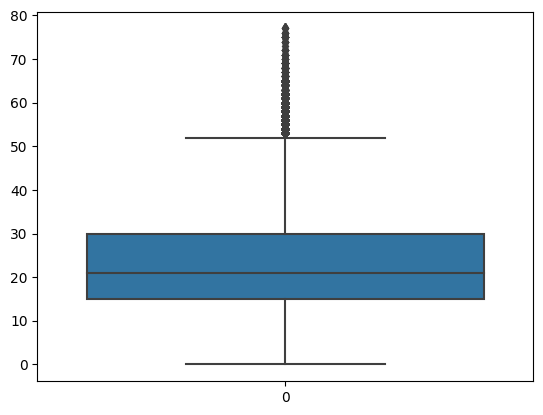

In [25]:
sns.boxplot(df['age'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


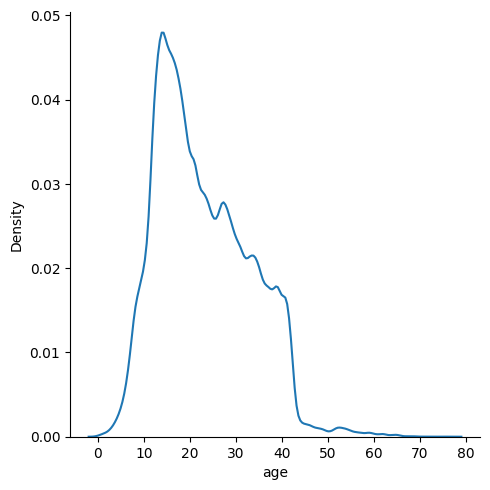

In [26]:
sns.displot(df['age'],kind='kde')

### balance:

In [27]:
df['balance'].describe()

count    750000.000000
mean       2296.327964
std        1381.568588
min           0.000000
25%        1294.000000
50%        1928.000000
75%        2683.000000
max        8216.000000
Name: balance, dtype: float64

<Axes: >

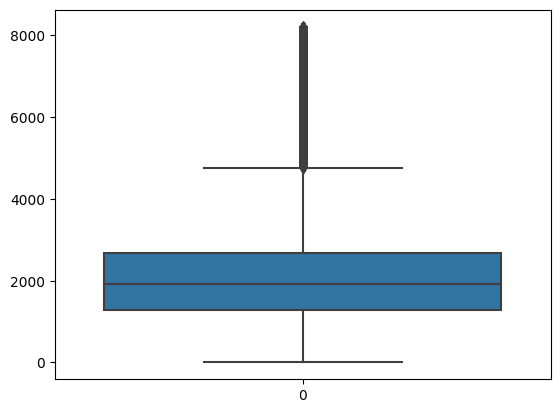

In [28]:
sns.boxplot(df['balance'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


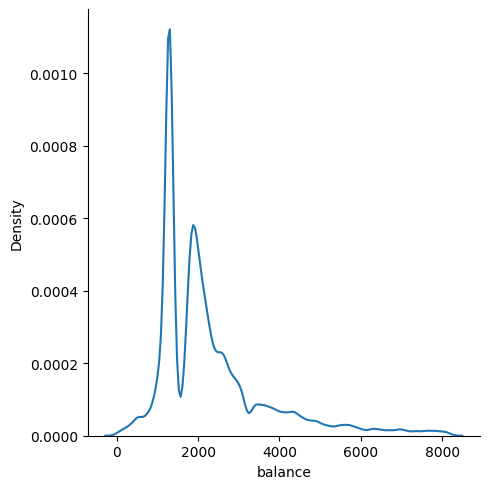

In [29]:
sns.displot(df['balance'],kind='kde')

### duration

In [30]:
df['duration'].describe()

count    750000.000000
mean        253.585712
std         268.748406
min           0.000000
25%          89.000000
50%         131.000000
75%         359.000000
max        1759.000000
Name: duration, dtype: float64

<Axes: >

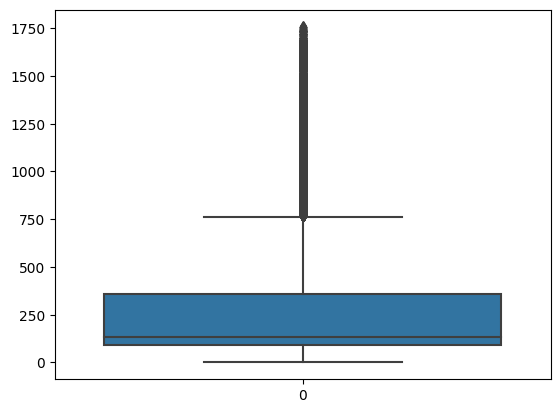

In [31]:
sns.boxplot(df['duration'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


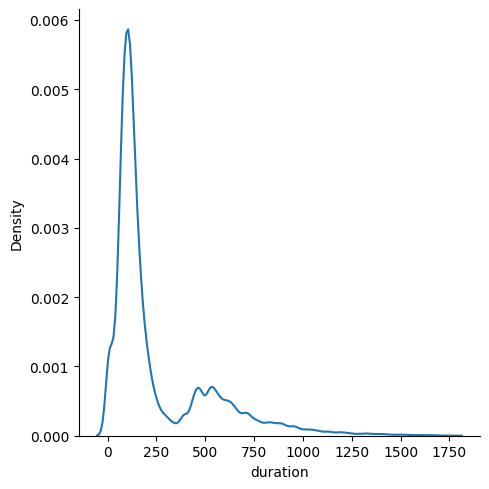

In [32]:
sns.displot(df['duration'],kind='kde')

# finding the coorelation with the target column:

In [33]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.034499,-0.414571,-0.128344,-0.014364,0.082419,-0.180702,-0.016553,0.029775,-0.015179,-0.050985,-0.004612,0.002047,-0.022656,0.004823,0.010894,0.009523
job,-0.034499,1.000000,0.075587,0.164123,-0.003283,0.019028,-0.140415,-0.030985,-0.114954,0.029036,-0.123905,0.015581,0.010930,-0.027335,-0.000928,0.016686,0.054058
marital,-0.414571,0.075587,1.000000,0.120753,-0.005574,0.037611,-0.028866,-0.047562,-0.055025,-0.010713,-0.013180,0.032630,-0.011701,0.018555,0.014938,-0.014731,0.073598
education,-0.128344,0.164123,0.120753,1.000000,-0.012431,0.081614,-0.107864,-0.050254,-0.144797,0.021341,-0.080375,0.013492,0.008461,-0.003099,0.021618,-0.013892,0.080259
default,-0.014364,-0.003283,-0.005574,-0.012431,1.000000,-0.120533,0.010113,0.089927,0.014166,0.013138,0.012956,-0.033112,0.027788,-0.016184,-0.014703,0.018939,-0.030134
balance,0.082419,0.019028,0.037611,0.081614,-0.120533,1.000000,-0.084365,-0.136527,-0.053496,-0.016546,0.027134,0.179825,-0.041894,0.013729,0.052035,-0.039863,0.186594
housing,-0.180702,-0.140415,-0.028866,-0.107864,0.010113,-0.084365,1.000000,0.064034,0.245907,-0.015233,0.356273,-0.008773,-0.034682,0.121290,0.036137,-0.102445,-0.153589
loan,-0.016553,-0.030985,-0.047562,-0.050254,0.089927,-0.136527,0.064034,1.000000,-0.008430,0.020151,0.040982,-0.031555,0.016353,-0.011812,-0.013364,0.008299,-0.081639
contact,0.029775,-0.114954,-0.055025,-0.144797,0.014166,-0.053496,0.245907,-0.008430,1.000000,-0.028574,0.403256,-0.045618,-0.013666,-0.193342,-0.141824,0.205322,-0.158278
day,-0.015179,0.029036,-0.010713,0.021341,0.013138,-0.016546,-0.015233,0.020151,-0.028574,1.000000,-0.001989,-0.057358,0.178900,-0.086607,-0.051931,0.076963,-0.049625


In [34]:
corr_matrix=df.corr()

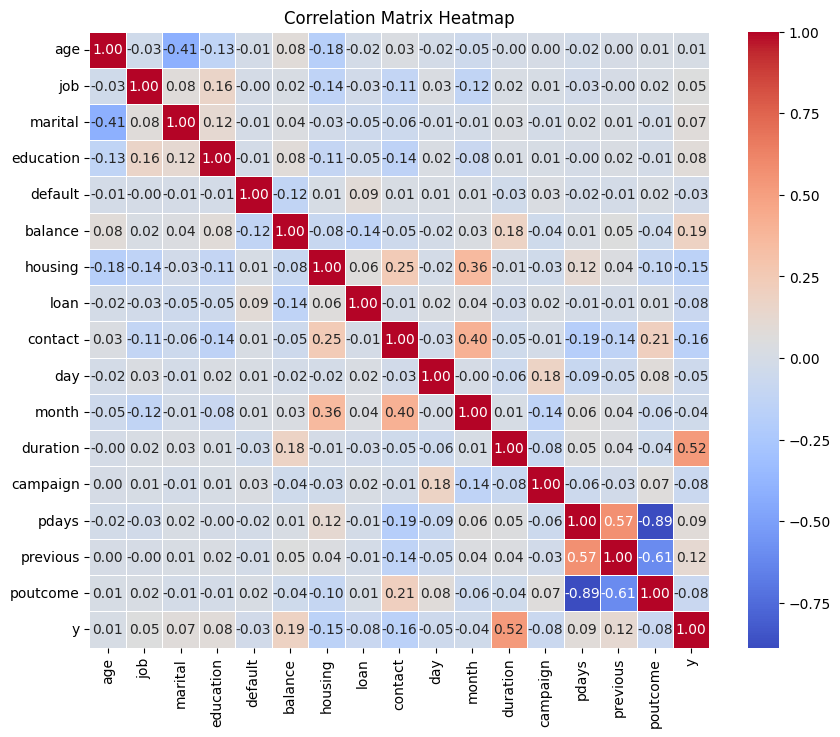

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Splitting dataset Into training and testing:

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x=df.drop('y',axis=1)
y=df['y']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
453635,10.0,1.0,2.0,1.0,0.0,5784.0,1.0,1.0,2.0,11.0,8.0,1282.0,1.0,0.0,0.0,3.0
11651,33.0,9.0,1.0,2.0,0.0,2588.0,0.0,0.0,0.0,26.0,1.0,117.0,8.0,0.0,0.0,3.0
431999,39.0,4.0,0.0,2.0,0.0,1294.0,0.0,0.0,0.0,28.0,4.0,85.0,0.0,0.0,0.0,3.0
529211,30.0,1.0,2.0,0.0,0.0,2616.0,1.0,0.0,2.0,14.0,8.0,81.0,4.0,0.0,0.0,3.0
110925,20.0,0.0,1.0,1.0,0.0,1953.0,1.0,0.0,0.0,27.0,5.0,532.0,3.0,0.0,0.0,3.0


In [40]:
y_train.head()

453635    1.0
11651     0.0
431999    0.0
529211    0.0
110925    0.0
Name: y, dtype: float64

# Scaling the training data:

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
ss=StandardScaler()

In [43]:
x_train_transformed=ss.fit_transform(x_train)
x_test_transformed=ss.transform(x_test)

In [44]:
x_train_transformed.shape

(600000, 16)

# Training using NN:

In [45]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

2025-08-19 16:41:16.648269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755621676.897588      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755621676.970058      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [46]:
model = Sequential()
model.add(Dense(64, input_dim=16, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-19 16:41:31.697909: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(x_train_transformed, y_train, validation_data=(x_test_transformed, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9114 - loss: 0.1991 - val_accuracy: 0.9216 - val_loss: 0.1786
Epoch 2/3500
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9221 - loss: 0.1759 - val_accuracy: 0.9239 - val_loss: 0.1728
Epoch 3/3500
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9236 - loss: 0.1743 - val_accuracy: 0.9252 - val_loss: 0.1707
Epoch 4/3500
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9261 - loss: 0.1687 - val_accuracy: 0.9261 - val_loss: 0.1682
Epoch 5/3500
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9270 - loss: 0.1668 - val_accuracy: 0.9275 - val_loss: 0.1653
Epoch 6/3500
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9276 - loss: 0.1652 - val_accuracy: 0.9275 - val_loss: 0.1649
Epoch 7/3500
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9294 - loss: 0.1616 - val_accuracy: 0.9285 - val_loss: 0.1640
Epoch 8/3500
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/s

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
plot_decision_regions(x_test_transformed, y_test.ravel(), clf = model, legend=2)
plt.show()

# Stacking with Meta Learner:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# ✅ Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf_preds = rf.predict_proba(x_test)[:, 1]

# ✅ Train Neural Network
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
nn.fit(x_train_transformed, y_train)
nn_preds = nn.predict_proba(x_test_transformed)[:, 1]

# ✅ Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)
xgb_preds = xgb.predict_proba(x_test)[:, 1]

# ✅ Train LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_train, y_train)
lgbm_preds = lgbm.predict_proba(x_test)[:, 1]


In [ ]:
# ✅ Stack predictions horizontally
stacked_preds = np.vstack([rf_preds, nn_preds, xgb_preds, lgbm_preds]).T

# ✅ Train meta learner (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(stacked_preds, y_test)

# ✅ Final predictions
final_preds = meta_model.predict(stacked_preds)

# ✅ Evaluate
accuracy = accuracy_score(y_test, final_preds)
print("Stacked Model Accuracy:", round(accuracy * 100, 2), "%")

In [ ]:
from xgboost import XGBClassifier

meta_model_xg_boost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
meta_model_xg_boost.fit(stacked_preds, y_test)
final_preds = meta_model.predict(stacked_preds)

from sklearn.metrics import accuracy_score
print("Stacked Accuracy with XGBoost Meta:", round(accuracy_score(y_test, final_preds) * 100, 2), "%")

# importing the testing dataset:

In [ ]:
df_test=pd.read_csv('/kaggle/input/playground-series-s5e8/test.csv',index_col=0)

In [ ]:
df_test.head()

In [ ]:
df_test_encoded=oe.fit_transform(df_test)

In [ ]:
df_test_scaled=ss.transform(df_test_encoded)

In [ ]:
df_test_scaled

In [ ]:
rf_preds   = rf.predict_proba(df_test_encoded)[:, 1]
xgb_preds  = xgb.predict_proba(df_test_encoded)[:, 1]
lgbm_preds = lgbm.predict_proba(df_test_encoded)[:, 1]
nn_preds   = nn.predict_proba(df_test_scaled)[:, 1]

In [ ]:
probabilities = pd.DataFrame(y_prob[:, 1], columns=['y'])

In [ ]:
probabilities.head()

In [ ]:
# Display probabilities rounded to two decimal places
probabilities_rounded = probabilities.round(2)
probabilities_rounded.head()
probabilities_rounded.index=df_test.index


In [ ]:
probabilities_rounded.head()

In [ ]:
probabilities_rounded.to_csv('submission.csv')